In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import glob
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.utils import to_categorical

from skimage.io import imread, imshow
from skimage.transform import resize, rescale

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#     print(dirname)
    pass
    
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
!ls /kaggle/input/chest-xray-pneumonia/chest_xray

__MACOSX  chest_xray  test  train  val


In [3]:
train = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'
test = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'
val = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val'

In [4]:
!ls /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val

NORMAL	PNEUMONIA


In [5]:
train_set = ImageDataGenerator(rescale = 1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              )

test_set = ImageDataGenerator(rescale = 1./255)

In [6]:
train

'/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'

In [7]:
train_data = train_set.flow_from_directory(train,
                                          target_size=(256, 256),
                                          batch_size=32)

test_data = test_set.flow_from_directory(test,
                                         target_size=(256, 256),
                                          batch_size=32)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
res = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

for layer in res.layers:
    layer.trainable = False

output = res.output
x = Flatten()(output)
x = Dense(2, activation='softmax')(x)

model = Model(inputs=res.input, outputs=x)

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [9]:
model = get_model()
print(model.summary())

NameError: name 'get_model' is not defined

In [10]:
# Compiling
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [11]:
result = model.fit_generator(train_data,
                   validation_data=test_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_steps=len(test_data))
# Chest X-Ray Images (Pneumonia)

Epoch 1/5
163/163 [==============================] - 173s 1s/step - loss: 1.9256 - acc: 0.9139 - val_loss: 17.3384 - val_acc: 0.6250
Epoch 2/5
163/163 [==============================] - 145s 888ms/step - loss: 1.3710 - acc: 0.9461 - val_loss: 36.7581 - val_acc: 0.6250
Epoch 3/5
163/163 [==============================] - 147s 903ms/step - loss: 1.5372 - acc: 0.9484 - val_loss: 43.2590 - val_acc: 0.6250
Epoch 4/5
163/163 [==============================] - 147s 901ms/step - loss: 1.4267 - acc: 0.9565 - val_loss: 54.1373 - val_acc: 0.6250
Epoch 5/5
163/163 [==============================] - 148s 905ms/step - loss: 1.6401 - acc: 0.9549 - val_loss: 28.9767 - val_acc: 0.6250


In [12]:
def plot_fig(history):
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(10)
    ax[0].plot(range(5), history['acc'], label='Training Accuracy')
    ax[0].plot(range(5), history['val_acc'], label='Validation Accuracy')
    ax[0].legend()
    ax[0].set_title('Accuracy plot')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    ax[1].plot(range(5), history['loss'], label='Training Loss')
    ax[1].plot(range(5), history['val_loss'], label='Validation Loss')
    ax[1].legend()
    ax[1].set_title('Loss plot')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')


    plt.tight_layout()
    plt.show()

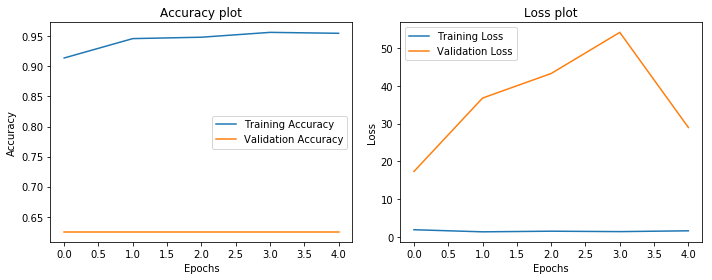

In [13]:
plot_fig(result.history)

# VGG16 Transfer learning
## Architecture

In [14]:
from keras.applications  import VGG16

vgg = VGG16(input_shape=(256,256,3), include_top=False, weights='imagenet')

for layer in vgg.layers:
    layer.trainable=False

output = vgg.output

x = Flatten()(output)

x = Dense(2, activation='softmax')(x)

vgg_model = Model(inputs=vgg.input, outputs=x)

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
print(vgg_model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [16]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
result_vgg = vgg_model.fit_generator(train_data,
                       validation_data=test_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 148s 911ms/step - loss: 0.2975 - acc: 0.8855 - val_loss: 0.0529 - val_acc: 0.9343
Epoch 2/5
163/163 [==============================] - 145s 887ms/step - loss: 0.1588 - acc: 0.9358 - val_loss: 0.2588 - val_acc: 0.9119
Epoch 3/5
163/163 [==============================] - 144s 886ms/step - loss: 0.1579 - acc: 0.9371 - val_loss: 0.1871 - val_acc: 0.9087
Epoch 4/5
163/163 [==============================] - 146s 893ms/step - loss: 0.1475 - acc: 0.9450 - val_loss: 0.0240 - val_acc: 0.8814
Epoch 5/5
163/163 [==============================] - 143s 876ms/step - loss: 0.1357 - acc: 0.9523 - val_loss: 0.1909 - val_acc: 0.9279


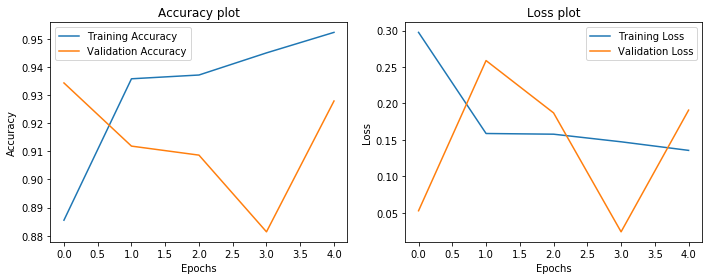

In [17]:
plot_fig(result_vgg.history)

In [18]:
val_gen = ImageDataGenerator(rescale=1./255)

In [19]:
val_data = val_gen.flow_from_directory(val,
                                      target_size=(256,256),
                                      batch_size=32)

Found 16 images belonging to 2 classes.


In [20]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
img = image.load_img(val+'/NORMAL/NORMAL2-IM-1431-0001.jpeg', target_size=(256,256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
classes = vgg_model.predict(img)
classes

array([[1., 0.]], dtype=float32)

In [21]:
vgg_model.evaluate(val_data,
                  steps=len(val_data))

1/1 [==============================] - 0s 315ms/step


[0.1173580139875412, 0.9375]